# Supervised learning: classification

In this exercise we will work with three types of classification models. To do so, we will make use of functions from the SKLEARN library. This library contains a lot of machine learning algorithms that are used in practise, so it is very valuable to familiarize yourself with the SKLEARN library.

## Libraries

In [81]:
import numpy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = pd.read_csv('iris-data.csv', na_values=['NA'])
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Data preparation 

We just loaded the iris dataset. It contains data of three types of irisses. The features are measures of the lenght and width of the sepal and petal. Let's first split the data in features and targets. The iris dataset is a well-defined set for educational purposes, but in practise you will have to define the features and targets before this step.  

In [84]:
average_petal_width = iris.loc[iris['class'] == 'Iris-setosa', 'petal_width_cm'].mean()


iris.loc[(iris['class'] == 'Iris-setosa') &
              (iris['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

data = iris[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values
target = iris['class'].values

To get a better understanding of the data, we will print the first example. 

In [85]:
print('The features of the first example are: ', data[0])

The features of the first example are:  [5.1 3.5 1.4 0.2]


In [86]:
print('The label of the first example is: ', target[0])

The label of the first example is:  Iris-setosa


The next thing to do is to create a trainset and a testset and to scale the variables.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                  test_size=1/3, random_state=123)

print(X_train.shape)
iris.loc[(iris['sepal_length_cm'].isnull()) |
              (iris['sepal_width_cm'].isnull()) |
              (iris['petal_length_cm'].isnull()) |
              (iris['petal_width_cm'].isnull())]

(100, 4)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


## Decision Tree Classifier 

To construct the classifier, we follow a few simple steps: 

In [100]:
#STEP 1: Choose the type of classifier 
DTalgorithm = tree.DecisionTreeClassifier()

#STEP 2: Fit the model to the train data
DTalgorithm = DTalgorithm.fit(X_train, y_train)

#STEP 3: Predict the labels of the test data 
Pred_DT = DTalgorithm.predict(X_test)

Congratulations! You just made a predictive algorithm!

The variable 'Pred_DT' holds the predictions made by the algorithm. Now let's take a look at your performance using classification accuracy. 

In [101]:
DT_CA = accuracy_score(y_test, Pred_DT) 

print('The Decision Tree Classifier reached a Classification Accuracy of: ', DT_CA)

The Decision Tree Classifier reached a Classification Accuracy of:  0.9


Did you get a good score? 

We are not done yet, though. We might be able to reach a better performance by tuning the parameters. The Decision Tree Classifier has lots of parameters, but the most important ones are: 

- Criterion (measure of impurity: the way the algorithm decides where to split the data, optional parameters are 'gini' and 'entropy'). 
- Splitter (strategy to choose the split, optional parameters are 'best' and 'random').
- Maximal depth (how deep the tree should go). 

Go back to the code in STEP 1 and play around with the parameters. 

For example: DTalgorithm = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7) 

Check the impact this has on the classification accuracy. 

## K-Nearest Neighbors 

To construct the classifier, we follow a few simple steps: 

In [102]:
#STEP 1: Choose the type of classifier 
KNNalgorithm = KNeighborsClassifier(n_neighbors = 3)

#STEP 2: Fit the model to the train data
KNNalgorithm = KNNalgorithm.fit(X_train, y_train)

#STEP 3: Predict the labels of the test data 
Pred_KNN = KNNalgorithm.predict(X_test)

Congratulations! You did it again!

The variable 'Pred_KNN' holds the predictions made by the algorithm. Now let's take a look at your performance using classification accuracy. 

In [91]:
KNN_CA = accuracy_score(y_test, Pred_KNN) 

print('The K-Nearest Neighbors Classifier reached a Classification Accuracy of: ', KNN_CA)

The K-Nearest Neighbors Classifier reached a Classification Accuracy of:  0.94


Did you get a good score? 

By know you probably know the drill. Tuning the parameters might help to reach a better performance. For K-Nearest Neighbors the most important parameter is the number of neighbors taken into account. The code now says 'n_neighbors = 3'. Play around with the number to see if the model can be improved. 


## Logistic Regression

To construct the classifier, we follow a few simple steps: 

In [103]:
#STEP 1: Choose the type of classifier 
LRalgorithm = LogisticRegression() 

#STEP 2: Fit the model to the train data
LRalgorithm = LRalgorithm.fit(X_train, y_train)

#STEP 3: Predict the labels of the test data 
Pred_LR = LRalgorithm.predict(X_test)

Cheers! Another model nicely constructed! Let's check the performance. 

In [104]:
LR_CA = accuracy_score(y_test, Pred_LR) 

print('The Logistic Regression Classifier reached a Classification Accuracy of: ', LR_CA)

The Logistic Regression Classifier reached a Classification Accuracy of:  0.86


For Logistic Regression there are lots of parameters. The most important ones to play around with are: 

- penalty, optional values: 'l1' or 'l2'
- solver, optional values: 'newton-cg', 'lbfgs', 'liblinear', 'sag' and 'saga'

Example: LRalgorithm = LogisticRegression(penalty='l2', solver='liblinear') 

Go ahead, try them out!

## Evaluation 

What model eventually reached the highest classification accuracy? 

In [105]:
print('The Decision Tree Classifier reached a Classification Accuracy of: ', DT_CA)
print('The K-Nearest Neighbors Classifier reached a Classification Accuracy of: ', KNN_CA)
print('The Logistic Regression Classifier reached a Classification Accuracy of: ', LR_CA)

The Decision Tree Classifier reached a Classification Accuracy of:  0.9
The K-Nearest Neighbors Classifier reached a Classification Accuracy of:  0.94
The Logistic Regression Classifier reached a Classification Accuracy of:  0.86


How can we automate part of the analysis?

LR: 0.890000 (0.094340)
LDA: 0.910000 (0.104403)
KNN: 0.880000 (0.146969)
CART: 0.810000 (0.137477)
NB: 0.850000 (0.111803)
SVM: 0.910000 (0.151327)


C:\Users\Daphne\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Daphne\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Daphne\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


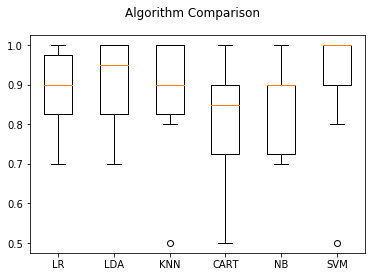

In [95]:
# Comparison of Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pandas.read_csv(url, names=names)
#array = dataframe.values
#X = array[:,0:8]
#Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()